## Data Description:
The dataset consists of feature vectors belonging to 12,330 sessions. Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

**Column Descriptions:**

* Administrative: This is the number of pages of this type (administrative) that the user visited.

* Administrative_Duration: This is the amount of time spent in this category of pages.

* Informational: This is the number of pages of this type (informational) that the user visited.

* Informational_Duration: This is the amount of time spent in this category of pages.

* ProductRelated: This is the number of pages of this type (product related) that the user visited.

* ProductRelated_Duration: This is the amount of time spent in this category of pages.

* BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

* ExitRates: The percentage of pageviews on the website that end at that specific page.

* PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.

* SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized.

* Month: Contains the month the pageview occurred, in string form.

* OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

* Browser: An integer value representing the browser that the user was using to view the page.

* Region: An integer value representing which region the user is located in.

* TrafficType: An integer value representing what type of traffic the user is categorized into.

* VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

* Weekend: A boolean representing whether the session is on a weekend.

* Revenue: A boolean representing whether or not the user completed the purchase.

## Project Goal
The main goal of this project is to design a machine learning classification system, that is able to predict an online shopper's intention ( buy or no buy ), based on the values of the given features.

We will try a number of different classification algorithms, and compare their performance, in order to pick the best one for the project.

## Importing Important Libraries

In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

## Data Import

In [2]:
df = pd.read_csv('online_shoppers_intention (1).csv')

In [3]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


## Data Description

### Data Header

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.shape

(12330, 18)

### Data Types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Administrative            12330 non-null  int64  
 1   Administrative_Duration   12330 non-null  float64
 2   Informational             12330 non-null  int64  
 3   Informational_Duration    12330 non-null  float64
 4   ProductRelated            12330 non-null  int64  
 5   ProductRelated_Duration   12330 non-null  float64
 6   BounceRates in %          12330 non-null  float64
 7   ExitRates in %            12330 non-null  float64
 8   PageValues                12330 non-null  float64
 9   SpecialDay (probability)  12330 non-null  float64
 10  Month                     12330 non-null  object 
 11  OperatingSystems          12330 non-null  int64  
 12  Browser                   12330 non-null  int64  
 13  Region                    12330 non-null  int64  
 14  Traffi

#### Here we can see that there are: 
* 7 int columns
* 7 float columns
* 2 bool columns
* 2 object columns

### Statistical Analysis of Data

In [7]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [9]:
# Number of unique values in each column
df.nunique()

Administrative                27
Administrative_Duration     3335
Informational                 17
Informational_Duration      1258
ProductRelated               311
ProductRelated_Duration     9551
BounceRates in %            1872
ExitRates in %              4777
PageValues                  2704
SpecialDay (probability)       6
Month                         10
OperatingSystems               8
Browser                       13
Region                         9
TrafficType                   20
VisitorType                    3
Weekend                        2
Revenue                        2
dtype: int64

## Data Cleaning

### Finding Missing Value

In [10]:
print(df.isnull().sum())
print('\n\nTotal number of null values in dataset:', df.isnull().sum().sum())

Administrative              0
Administrative_Duration     0
Informational               0
Informational_Duration      0
ProductRelated              0
ProductRelated_Duration     0
BounceRates in %            0
ExitRates in %              0
PageValues                  0
SpecialDay (probability)    0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


Total number of null values in dataset: 0


##### Since there are no missing values in the data therefore there is no need of fixing or replacing any Null Value in the dataset

## Data Visualisation [EDA]

### Correlation Matrix

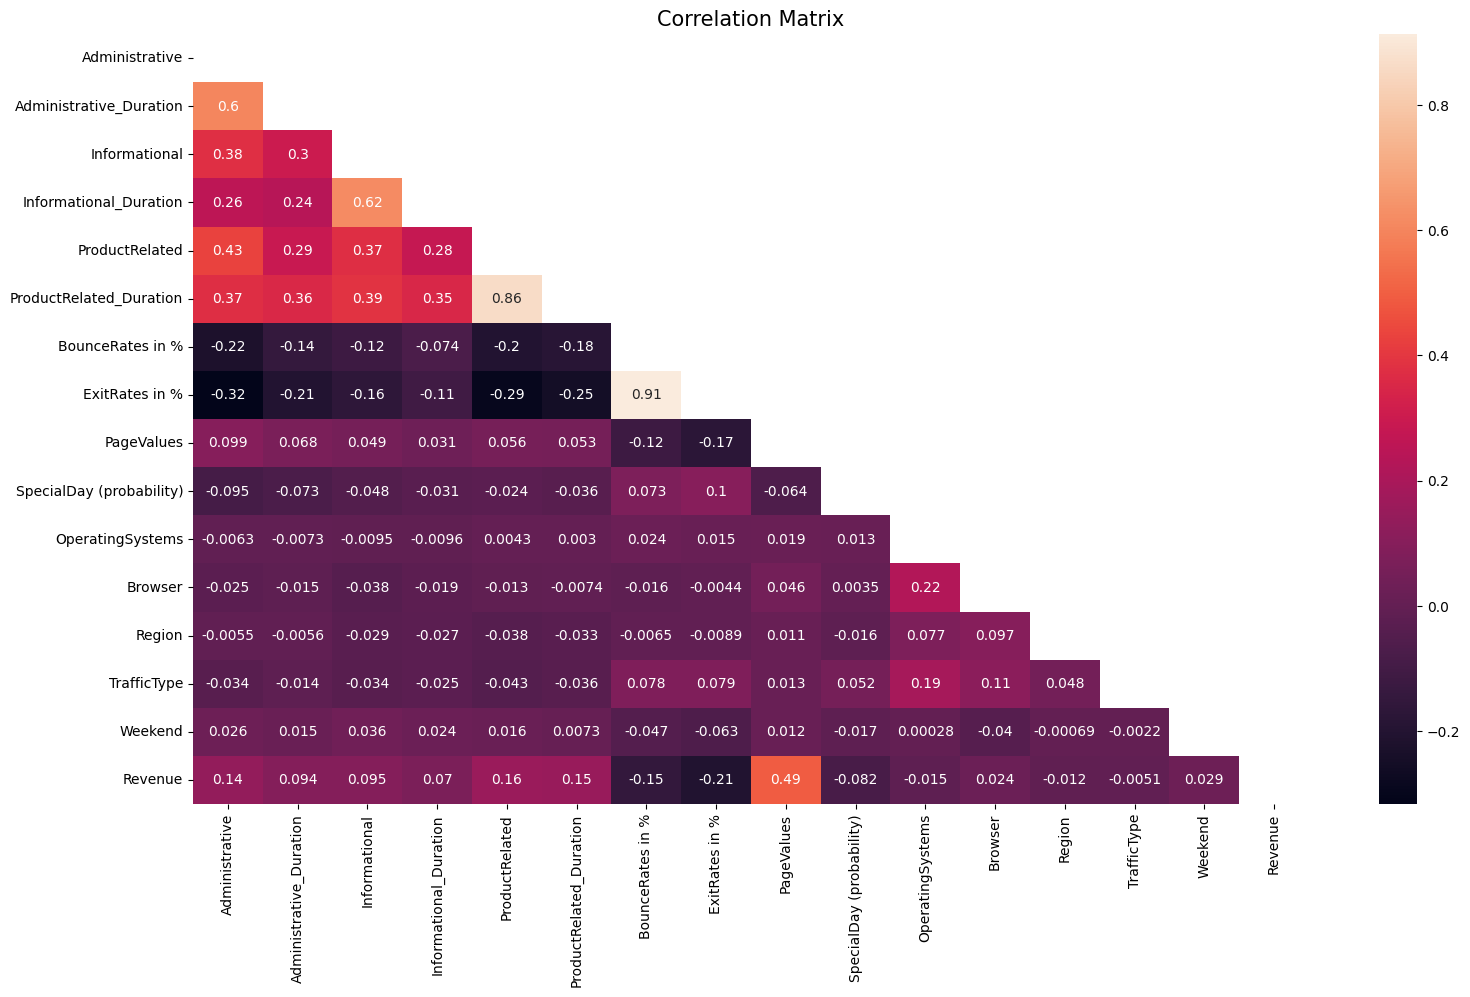

In [11]:
matrix = np.triu(df.corr())
plt.subplots(figsize=(18,10))
plt.title('Correlation Matrix', fontsize= 15)
sns.heatmap(df.corr(), annot=True, mask=matrix)
plt.show()

From the above heatmap, we observe the following:

In general, there is very little correlation among the different features in our dataset.
* The very few cases of high correlation (|corr| >= 0.7) are:
    - BounceRates & ExitRates (0.9).
    - ProductRelated & ProductRelated_Duration (0.86).
* Moderate Correlations (0.3 < |corr| < 0.7):
    - Among the following features: Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, and ProductRelated_Duration.
    - Also between PageValues and Revenue.

### Univariate Analysis

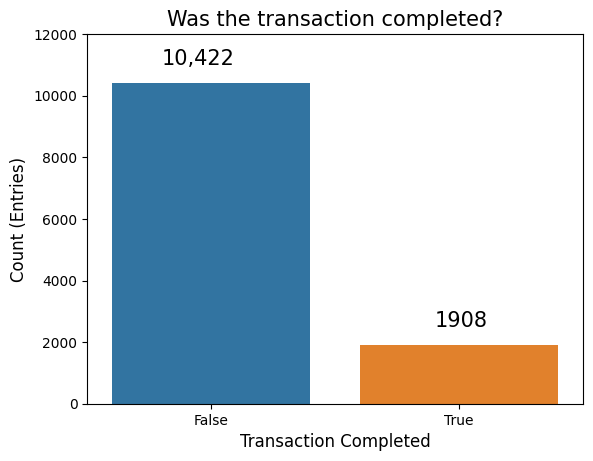

In [12]:
sns.countplot(data=df, x = 'Revenue')
plt.ylim(0,12000)

plt.title('Was the transaction completed?', fontsize= 15)
plt.xlabel('Transaction Completed', fontsize=12)
plt.ylabel('Count (Entries)', fontsize=12)

plt.text(x=-0.2, y=11000 ,s='10,422', fontsize=15)
plt.text(x=0.9, y=2500, s='1908', fontsize=15)
plt.show()

##### In the Dataset out of 12330 entries there are 10422 instances where there was no purchase made and  only 1908 counts where the purchase was completed

In [13]:
df['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

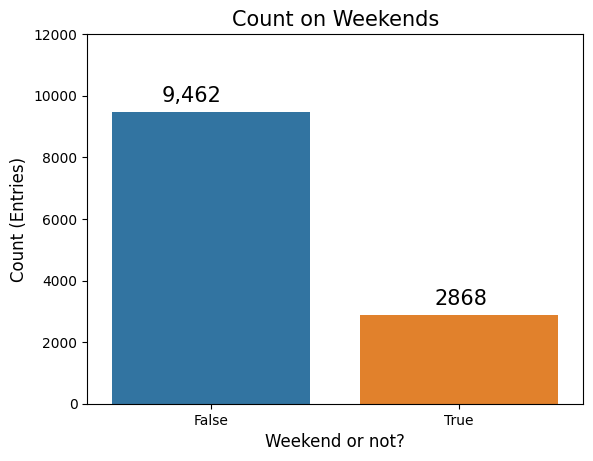

In [14]:
sns.countplot(data=df, x = 'Weekend')
plt.ylim(0,12000)

plt.title('Count on Weekends', fontsize= 15)
plt.xlabel('Weekend or not?', fontsize=12)
plt.ylabel('Count (Entries)', fontsize=12)

plt.text(x=-0.2, y=9800 ,s='9,462', fontsize=15)
plt.text(x=0.9, y=3200, s='2868', fontsize=15)
plt.show()


##### From above we can see that there were less purchase made on Weekends

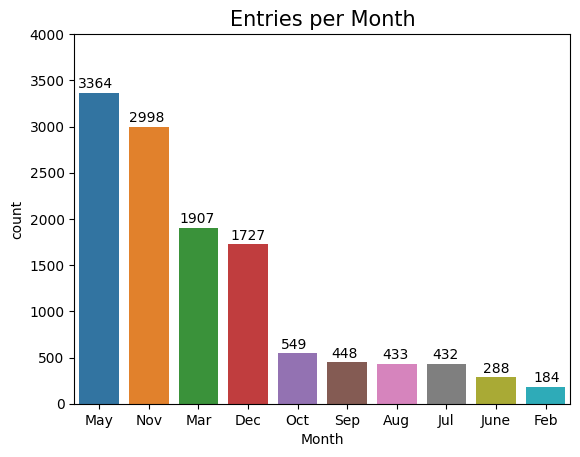

In [15]:
monthly = df['Month'].value_counts()

sns.countplot(data=df, x = 'Month', order=monthly.index)
plt.title('Entries per Month', fontsize=15)

xval = -.42
plt.ylim(0,4000)

for index, value in monthly.items():
    plt.text(x=xval, y=value+50, s=str(value))
    xval += 1.02

In [65]:
monthly.index

Index(['May', 'Nov', 'Mar', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul', 'June', 'Feb'], dtype='object')

In [67]:
monthly.items

<bound method Series.items of May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64>

In [16]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

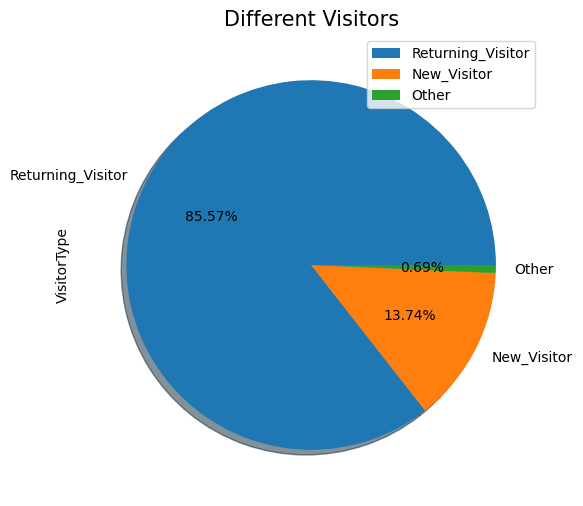

In [17]:
vt_plot = df['VisitorType'].value_counts().plot.pie(figsize=(6,6), autopct='%1.2f%%', shadow=True)
plt.title('Different Visitors', fontsize=15)
plt.legend()
plt.show()

##### Number of returning visitors are far more than other type of Visitors

In [18]:
df['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

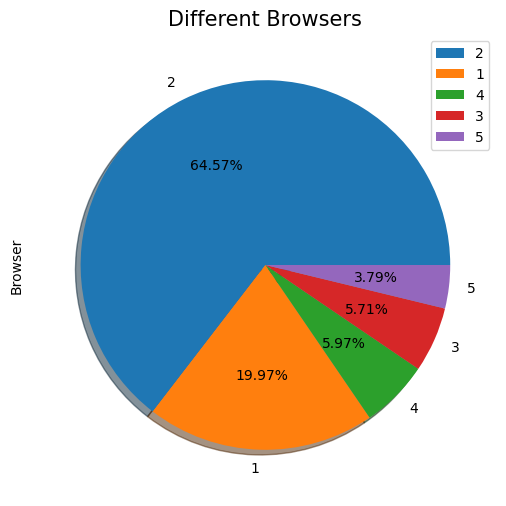

In [19]:
df['Browser'] = df['Browser'].replace([6,10,8,3,13,7,12,11,9], 3)
vt_plot = df['Browser'].value_counts().plot.pie(figsize=(6,6), autopct='%1.2f%%', shadow=True)
plt.title('Different Browsers', fontsize=15)
plt.legend()
plt.show()

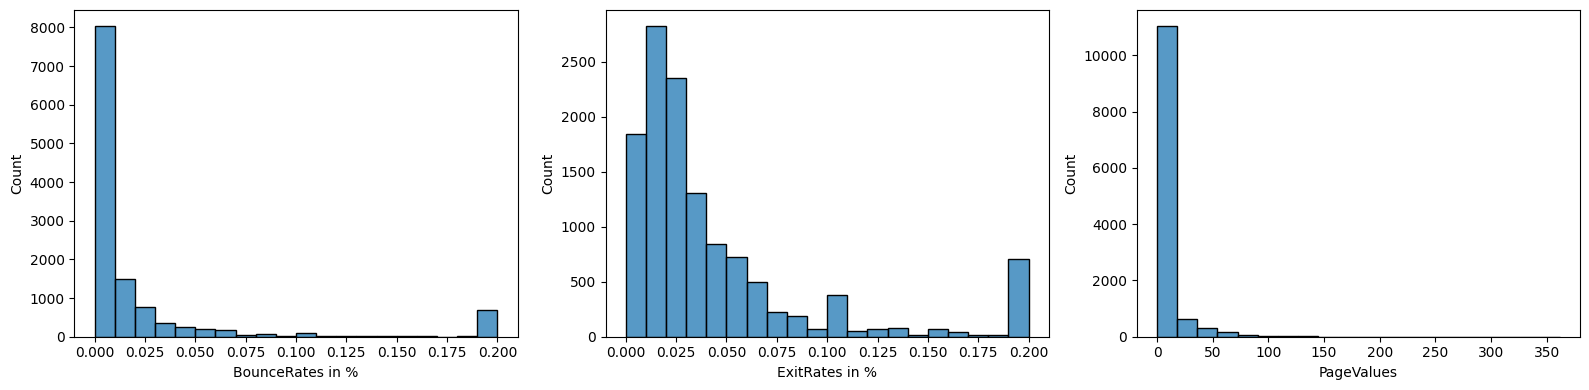

In [20]:
fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.histplot(df['BounceRates in %'], bins=20, ax=ax1)
sns.histplot(df['ExitRates in %'], bins=20, ax=ax2)
sns.histplot(df['PageValues'], bins=20, ax=ax3)

plt.show()

##### BounceRates & PageValues do not follow a normal distribution.
* All 3 features have distributions that are skewed right.
* All 3 distributions have a lot of outliers.
* The average bounce and exit rates of most of our data points is low, which is good, since high rates identicate that visitors are not engaging with the website.
* Exit rate has more high values than bounce rate which makes sense.

### Bivariate Analysis

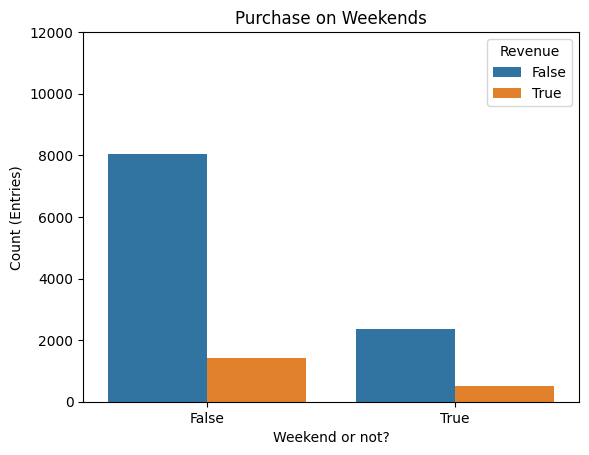

In [21]:
sns.countplot(data=df, x = 'Weekend', hue = 'Revenue')
plt.ylim(0,12000)

plt.title('Purchase on Weekends')
plt.xlabel('Weekend or not?')
plt.ylabel('Count (Entries)')
plt.show()

#### Less people make purchase on weekends and the revenue generated is also less on weekends. It does not look like weekends affect the number of visits or transactions.

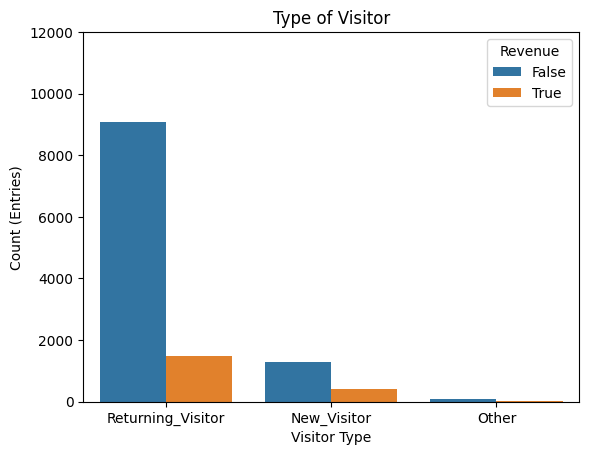

In [22]:
sns.countplot(data=df, x = 'VisitorType', hue = 'Revenue')
plt.ylim(0,12000)

plt.title('Type of Visitor')
plt.xlabel('Visitor Type')
plt.ylabel('Count (Entries)')
plt.show()

##### The number of Returning visitors is more & are making more purchase

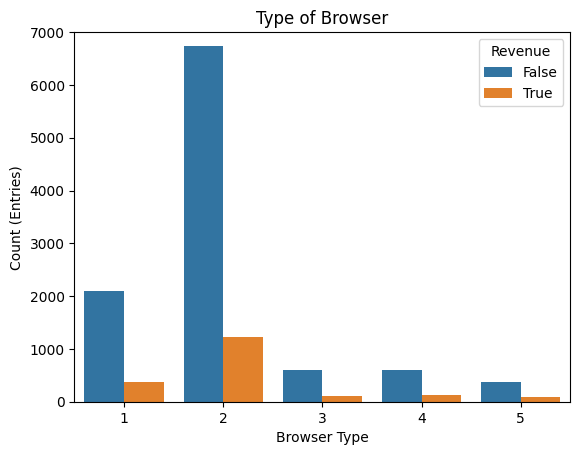

In [23]:
sns.countplot(data=df, x = 'Browser', hue = 'Revenue')
plt.ylim(0,7000)

plt.title('Type of Browser')
plt.xlabel('Browser Type')
plt.ylabel('Count (Entries)')
plt.show()

##### Shoppers using Browser 2 are visiting more to the website & making more purchase as compared to other Browser users

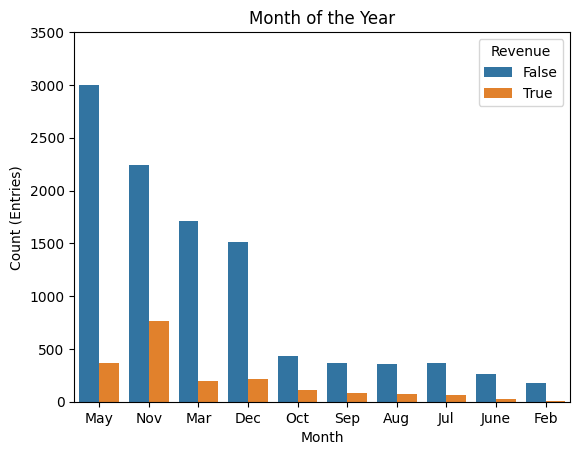

In [24]:
monthly = df['Month'].value_counts()
sns.countplot(data=df, x = 'Month', order=monthly.index, hue = 'Revenue')
plt.ylim(0,3500)

plt.title('Month of the Year')
plt.xlabel('Month')
plt.ylabel('Count (Entries)')
plt.show()

#### Most transactions happen during the end of the year with November as the month with highest number of transactions

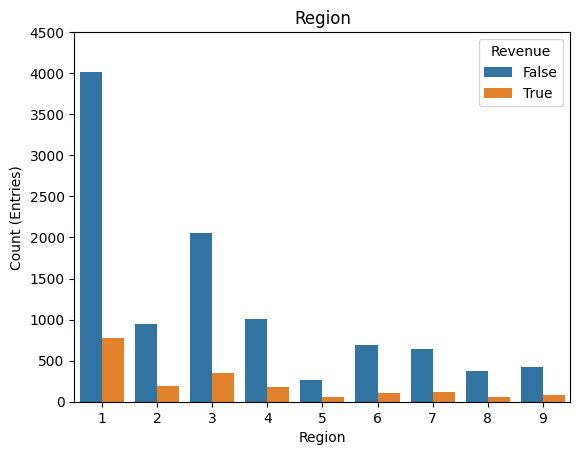

In [25]:
sns.countplot(data=df, x = 'Region', hue = 'Revenue')
plt.ylim(0,4500)

plt.title('Region')
plt.xlabel('Region')
plt.ylabel('Count (Entries)')
plt.show()

##### There is significant visit of shoppers from Region 1 & 3 and their purchase is also significant as compared to people of other Regions

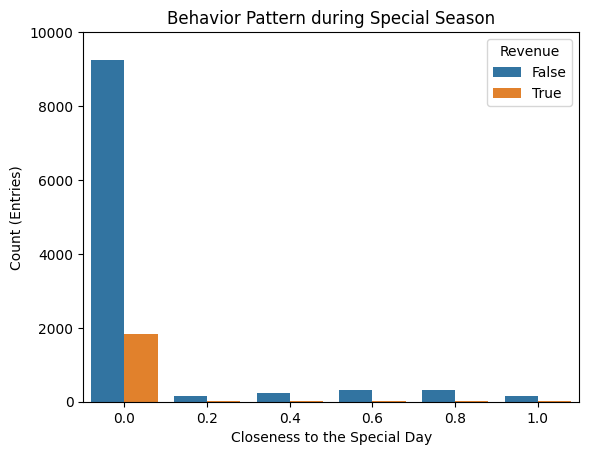

In [26]:
sns.countplot(data=df, x = 'SpecialDay (probability)', hue = 'Revenue')
plt.ylim(0,10000)

plt.title('Behavior Pattern during Special Season')
plt.xlabel('Closeness to the Special Day')
plt.ylabel('Count (Entries)')
plt.show()

#### We can see that most number of transactions happen on special days (like Black Friday, Mother's Day, New Year etc.......) (Special Day = 0)

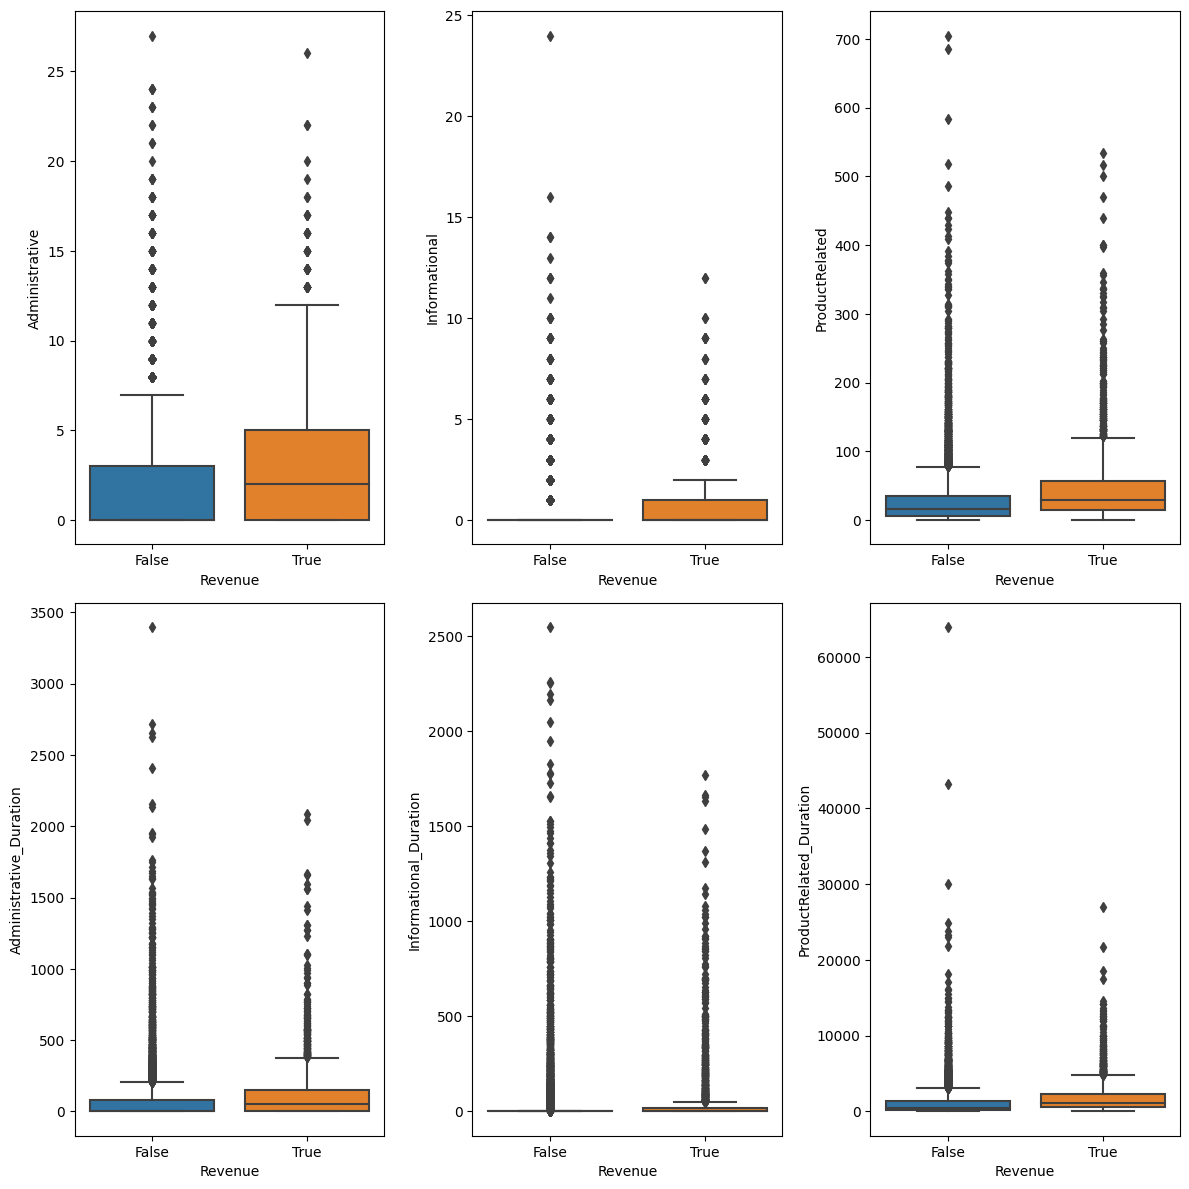

In [27]:
# Web Page Analysis
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.boxplot(data=df, x = 'Revenue', y = 'Administrative', ax=ax1)
sns.boxplot(data=df, x = 'Revenue', y = 'Informational', ax=ax2)
sns.boxplot(data=df, x = 'Revenue', y = 'ProductRelated', ax=ax3)
sns.boxplot(data=df, x = 'Revenue', y = 'Administrative_Duration', ax=ax4)
sns.boxplot(data=df, x = 'Revenue', y = 'Informational_Duration', ax=ax5)
sns.boxplot(data=df, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6)

plt.tight_layout()
plt.show()


##### From the above boxplots, we can see that:

* In general, visitors tend to visit less pages, and spend less time, if they are not going to make a purchase.
* The number of product related pages, and the time spent on them, is way higher than that for account related or informational pages.

<AxesSubplot: xlabel='Revenue', ylabel='ExitRates in %'>

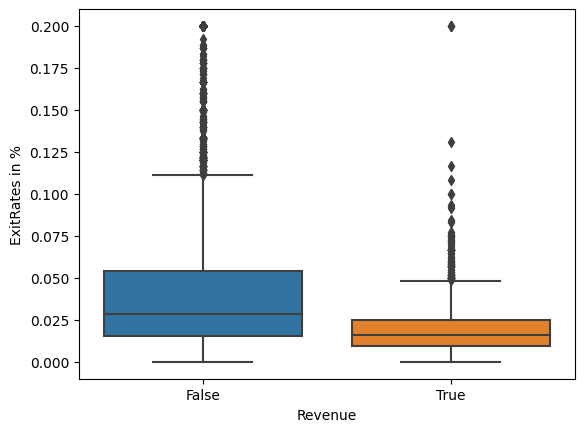

In [28]:
sns.boxplot(data=df, x = 'Revenue', y = 'ExitRates in %')

##### More the exit rates less is the purchase

<AxesSubplot: xlabel='Revenue', ylabel='BounceRates in %'>

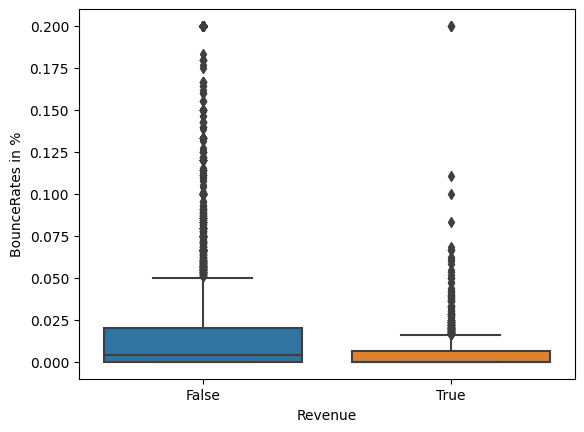

In [29]:
sns.boxplot(data=df, x = 'Revenue', y = 'BounceRates in %')

##### More the bounce rates less is the purchase

### Multivariate Analysis

<AxesSubplot: xlabel='ProductRelated', ylabel='ProductRelated_Duration'>

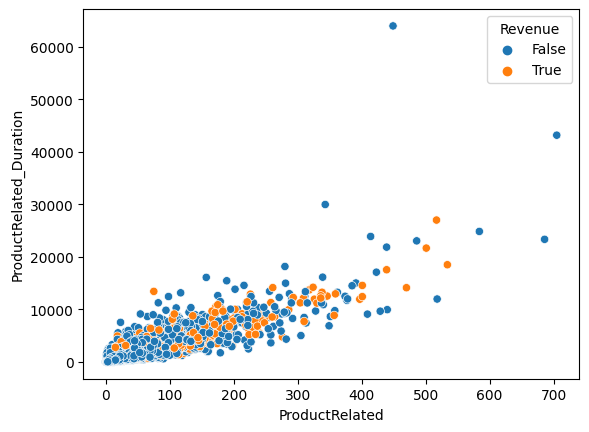

In [30]:
sns.scatterplot(data=df, x = 'ProductRelated', y = 'ProductRelated_Duration', hue = 'Revenue')

##### More the number of product related visitors and more the time spent good revenue is made.

<AxesSubplot: xlabel='BounceRates in %', ylabel='ExitRates in %'>

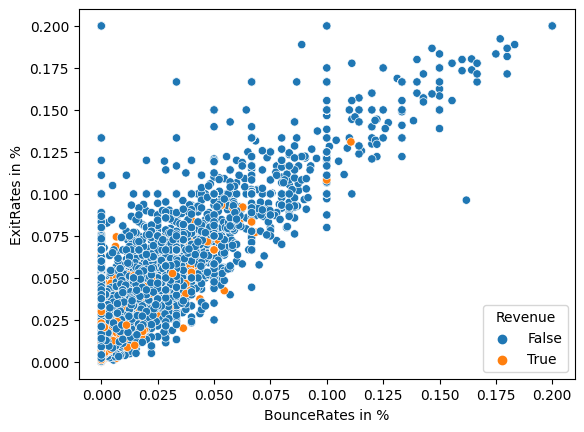

In [31]:
sns.scatterplot(data=df, x = 'BounceRates in %', y = 'ExitRates in %', hue = 'Revenue')

##### More the Bounce rates & Exit rates lesser is the revenue generated i.e less number of confirmed transactions happened

## Data Preprocessing
In this section we will be making our data ready for Model training

### Transforming the Data
* One Hot Encoding on **Month** column
* Label Encoding on **Visitor Type** Column
* Changing the Datatype of **Weekend & Revenue** columns

In [32]:
ohe_df = pd.concat([df,pd.get_dummies(df['Month'], prefix='Month')], axis=1).drop(['Month'],axis=1)
ohe_df['VisitorType'] = df['VisitorType'].replace(['Returning_Visitor', 'New_Visitor', 'Other'], [0,1,2])
ohe_df['Revenue'] = df['Revenue'].astype('int')

In [33]:
ohe_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [34]:
ohe_df['Revenue'].unique()

array([0, 1])

In [35]:
ohe_df['VisitorType'].unique()

array([0, 1, 2], dtype=int64)

## Splitting Data into Dependent & Independent Variables

In [36]:
X = ohe_df.drop('Revenue', axis=1)
y = ohe_df['Revenue']

In [37]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [38]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Revenue, dtype: int32

In [39]:
X.shape

(12330, 26)

In [40]:
y.shape

(12330,)

### Train & Test Split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.2)

## Data Scaling

In [42]:
sc = StandardScaler()
  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building Models before Balancing the Dataset

### Gaussian Naive Bayes

In [43]:
nbm = GaussianNB()
nbm.fit(X_train,y_train)
y_pred_nbm = nbm.predict(X_test)

print('Gaussian Naive Bayes Performance without Balancing:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, y_pred_nbm))
print('F1 Score        : ', metrics.f1_score(y_test, y_pred_nbm))
print('Precision       : ', metrics.precision_score(y_test, y_pred_nbm))
print('Recall          : ', metrics.recall_score(y_test, y_pred_nbm))
print('Confusion Matrix:\n ', confusion_matrix(y_test, y_pred_nbm))
print(classification_report(y_test, y_pred_nbm, target_names=['Rev=0', 'Rev=1']))

Gaussian Naive Bayes Performance without Balancing:
---------------------------------
Accuracy        :  0.7157339821573399
F1 Score        :  0.4693414080242241
Precision       :  0.3276955602536998
Recall          :  0.8266666666666667
Confusion Matrix:
  [[1455  636]
 [  65  310]]
              precision    recall  f1-score   support

       Rev=0       0.96      0.70      0.81      2091
       Rev=1       0.33      0.83      0.47       375

    accuracy                           0.72      2466
   macro avg       0.64      0.76      0.64      2466
weighted avg       0.86      0.72      0.75      2466



### KNN

In [44]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

print('K-Nearest Neighbour Performance without Balancing:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, y_pred_knn))
print('F1 Score        : ', metrics.f1_score(y_test, y_pred_knn))
print('Precision       : ', metrics.precision_score(y_test, y_pred_knn))
print('Recall          : ', metrics.recall_score(y_test, y_pred_knn))
print('Confusion Matrix:\n ', confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, target_names=['Rev=0', 'Rev=1']))

K-Nearest Neighbour Performance without Balancing:
---------------------------------
Accuracy        :  0.8730738037307381
F1 Score        :  0.47217537942664417
Precision       :  0.6422018348623854
Recall          :  0.37333333333333335
Confusion Matrix:
  [[2013   78]
 [ 235  140]]
              precision    recall  f1-score   support

       Rev=0       0.90      0.96      0.93      2091
       Rev=1       0.64      0.37      0.47       375

    accuracy                           0.87      2466
   macro avg       0.77      0.67      0.70      2466
weighted avg       0.86      0.87      0.86      2466



### Support Vector Macine

In [45]:
svm = SVC()
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)

print('SVM Performance without Balancing:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, y_pred_svm))
print('F1 Score        : ', metrics.f1_score(y_test, y_pred_svm))
print('Precision       : ', metrics.precision_score(y_test, y_pred_svm))
print('Recall          : ', metrics.recall_score(y_test, y_pred_svm))
print('Confusion Matrix:\n ', confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, target_names=['Rev=0', 'Rev=1']))

SVM Performance without Balancing:
---------------------------------
Accuracy        :  0.8961881589618816
F1 Score        :  0.5870967741935484
Precision       :  0.7428571428571429
Recall          :  0.48533333333333334
Confusion Matrix:
  [[2028   63]
 [ 193  182]]
              precision    recall  f1-score   support

       Rev=0       0.91      0.97      0.94      2091
       Rev=1       0.74      0.49      0.59       375

    accuracy                           0.90      2466
   macro avg       0.83      0.73      0.76      2466
weighted avg       0.89      0.90      0.89      2466



### Logistic Regression Classifier

In [46]:
lrm = LogisticRegression()
lrm.fit(X_train,y_train)
y_pred_lrm = lrm.predict(X_test)

print('Logistic Regression Performance without Balancing:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, y_pred_lrm))
print('F1 Score        : ', metrics.f1_score(y_test, y_pred_lrm))
print('Precision       : ', metrics.precision_score(y_test, y_pred_lrm))
print('Recall          : ', metrics.recall_score(y_test, y_pred_lrm))
print('Confusion Matrix:\n ', confusion_matrix(y_test, y_pred_lrm))
print(classification_report(y_test, y_pred_lrm, target_names=['Rev=0', 'Rev=1']))

Logistic Regression Performance without Balancing:
---------------------------------
Accuracy        :  0.8880778588807786
F1 Score        :  0.5306122448979592
Precision       :  0.7323943661971831
Recall          :  0.416
Confusion Matrix:
  [[2034   57]
 [ 219  156]]
              precision    recall  f1-score   support

       Rev=0       0.90      0.97      0.94      2091
       Rev=1       0.73      0.42      0.53       375

    accuracy                           0.89      2466
   macro avg       0.82      0.69      0.73      2466
weighted avg       0.88      0.89      0.87      2466



### Random Forest Classifier

In [47]:
rfm = RandomForestClassifier()
rfm.fit(X_train,y_train)
y_pred_rfm = rfm.predict(X_test)

print('Random Forest Performance without Balancing:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, y_pred_rfm))
print('F1 Score        : ', metrics.f1_score(y_test, y_pred_rfm))
print('Precision       : ', metrics.precision_score(y_test, y_pred_rfm))
print('Recall          : ', metrics.recall_score(y_test, y_pred_rfm))
print('Confusion Matrix:\n ', confusion_matrix(y_test, y_pred_rfm))
print(classification_report(y_test, y_pred_rfm, target_names=['Rev=0', 'Rev=1']))

Random Forest Performance without Balancing:
---------------------------------
Accuracy        :  0.9030819140308192
F1 Score        :  0.6490455212922174
Precision       :  0.7222222222222222
Recall          :  0.5893333333333334
Confusion Matrix:
  [[2006   85]
 [ 154  221]]
              precision    recall  f1-score   support

       Rev=0       0.93      0.96      0.94      2091
       Rev=1       0.72      0.59      0.65       375

    accuracy                           0.90      2466
   macro avg       0.83      0.77      0.80      2466
weighted avg       0.90      0.90      0.90      2466



### Decision Tree Classifier

In [48]:
dtm = DecisionTreeClassifier()
dtm.fit(X_train,y_train)
y_pred_dtm = dtm.predict(X_test)

print('Decision Tree Performance without Balancing:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, y_pred_dtm))
print('F1 Score        : ', metrics.f1_score(y_test, y_pred_dtm))
print('Precision       : ', metrics.precision_score(y_test, y_pred_dtm))
print('Recall          : ', metrics.recall_score(y_test, y_pred_dtm))
print('Confusion Matrix:\n ', confusion_matrix(y_test, y_pred_dtm))
print(classification_report(y_test, y_pred_dtm, target_names=['Rev=0', 'Rev=1']))

Decision Tree Performance without Balancing:
---------------------------------
Accuracy        :  0.8698296836982968
F1 Score        :  0.5921219822109275
Precision       :  0.5655339805825242
Recall          :  0.6213333333333333
Confusion Matrix:
  [[1912  179]
 [ 142  233]]
              precision    recall  f1-score   support

       Rev=0       0.93      0.91      0.92      2091
       Rev=1       0.57      0.62      0.59       375

    accuracy                           0.87      2466
   macro avg       0.75      0.77      0.76      2466
weighted avg       0.88      0.87      0.87      2466



## Building Models after Balancing the Dataset using SMOTE technique

Balancing techniques are to be applied only on the Training Data i.e X_train & y_train

In [49]:
X1 = X.copy()
y1 = y.copy()

In [50]:
from imblearn.over_sampling import SMOTE
smot = SMOTE(sampling_strategy='not majority')
X_smot, y_smot = smot.fit_resample(X1,y1)

In [51]:
print("Before Oversampling count of label '0':", y.value_counts()[0])
print("Before Oversampling count of label '1':", y.value_counts()[1])

Before Oversampling count of label '0': 10422
Before Oversampling count of label '1': 1908


In [52]:
print("After Oversampling count of label '0':", y_smot.value_counts()[0])
print("After Oversampling count of label '1':", y_smot.value_counts()[1])

After Oversampling count of label '0': 10422
After Oversampling count of label '1': 10422


In [53]:
print("Before Oversampling shape of X :", X1.shape)
print("After Oversampling shape of X :", X_smot.shape)

Before Oversampling shape of X : (12330, 26)
After Oversampling shape of X : (20844, 26)


In [54]:
y1.shape

(12330,)

In [55]:
y_smot.shape

(20844,)

### Train & Test Split

In [56]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_smot, y_smot, test_size=0.2, random_state=101)

### Scaling of Data

In [57]:
sc = StandardScaler()
  
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

## Building Models

### Gaussian Naive Bayes

In [58]:
nbm1 = GaussianNB()
nbm1.fit(X_train1,y_train1)
y_pred_nbm1 = nbm1.predict(X_test1)

print('Gaussian Naive Bayes Performance with Balancing:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test1, y_pred_nbm1))
print('F1 Score        : ', metrics.f1_score(y_test1, y_pred_nbm1))
print('Precision       : ', metrics.precision_score(y_test1, y_pred_nbm1))
print('Recall          : ', metrics.recall_score(y_test1, y_pred_nbm1))
print('Confusion Matrix:\n ', confusion_matrix(y_test1, y_pred_nbm1))
print(classification_report(y_test1, y_pred_nbm1, target_names=['Rev=0', 'Rev=1']))

Gaussian Naive Bayes Performance with Balancing:
---------------------------------
Accuracy        :  0.7822019668985368
F1 Score        :  0.8028658271819367
Precision       :  0.7253825029423303
Recall          :  0.8988818667963053
Confusion Matrix:
  [[1412  700]
 [ 208 1849]]
              precision    recall  f1-score   support

       Rev=0       0.87      0.67      0.76      2112
       Rev=1       0.73      0.90      0.80      2057

    accuracy                           0.78      4169
   macro avg       0.80      0.78      0.78      4169
weighted avg       0.80      0.78      0.78      4169



### KNN

In [59]:
knn1 = KNeighborsClassifier()
knn1.fit(X_train1,y_train1)
y_pred_knn1 = knn1.predict(X_test1)

print('K-Nearest Neighbour Performance with Balancing:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test1, y_pred_knn1))
print('F1 Score        : ', metrics.f1_score(y_test1, y_pred_knn1))
print('Precision       : ', metrics.precision_score(y_test1, y_pred_knn1))
print('Recall          : ', metrics.recall_score(y_test1, y_pred_knn1))
print('Confusion Matrix:\n ', confusion_matrix(y_test1, y_pred_knn1))
print(classification_report(y_test1, y_pred_knn1, target_names=['Rev=0', 'Rev=1']))

K-Nearest Neighbour Performance with Balancing:
---------------------------------
Accuracy        :  0.8906212520988247
F1 Score        :  0.888125613346418
Precision       :  0.8964834076275384
Recall          :  0.8799222168206126
Confusion Matrix:
  [[1903  209]
 [ 247 1810]]
              precision    recall  f1-score   support

       Rev=0       0.89      0.90      0.89      2112
       Rev=1       0.90      0.88      0.89      2057

    accuracy                           0.89      4169
   macro avg       0.89      0.89      0.89      4169
weighted avg       0.89      0.89      0.89      4169



### SVM

In [60]:
svm1 = SVC()
svm1.fit(X_train1,y_train1)
y_pred_svm1 = svm1.predict(X_test1)

print('SVM Performance with Balancing:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test1, y_pred_svm1))
print('F1 Score        : ', metrics.f1_score(y_test1, y_pred_svm1))
print('Precision       : ', metrics.precision_score(y_test1, y_pred_svm1))
print('Recall          : ', metrics.recall_score(y_test1, y_pred_svm1))
print('Confusion Matrix:\n ', confusion_matrix(y_test1, y_pred_svm1))
print(classification_report(y_test1, y_pred_svm1, target_names=['Rev=0', 'Rev=1']))

SVM Performance with Balancing:
---------------------------------
Accuracy        :  0.9095706404413528
F1 Score        :  0.9065212000991818
Precision       :  0.9251012145748988
Recall          :  0.8886728245017015
Confusion Matrix:
  [[1964  148]
 [ 229 1828]]
              precision    recall  f1-score   support

       Rev=0       0.90      0.93      0.91      2112
       Rev=1       0.93      0.89      0.91      2057

    accuracy                           0.91      4169
   macro avg       0.91      0.91      0.91      4169
weighted avg       0.91      0.91      0.91      4169



### Logistic Regression

In [61]:
lrm1 = LogisticRegression()
lrm1.fit(X_train1,y_train1)
y_pred_lrm1 = lrm1.predict(X_test1)

print('Logistic Regression Performance with Balancing:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test1, y_pred_lrm1))
print('F1 Score        : ', metrics.f1_score(y_test1, y_pred_lrm1))
print('Precision       : ', metrics.precision_score(y_test1, y_pred_lrm1))
print('Recall          : ', metrics.recall_score(y_test1, y_pred_lrm1))
print('Confusion Matrix:\n ', confusion_matrix(y_test1, y_pred_lrm1))
print(classification_report(y_test1, y_pred_lrm1, target_names=['Rev=0', 'Rev=1']))

Logistic Regression Performance with Balancing:
---------------------------------
Accuracy        :  0.8985368193811466
F1 Score        :  0.8932626797880394
Precision       :  0.9286463798530955
Recall          :  0.8604764219737482
Confusion Matrix:
  [[1976  136]
 [ 287 1770]]
              precision    recall  f1-score   support

       Rev=0       0.87      0.94      0.90      2112
       Rev=1       0.93      0.86      0.89      2057

    accuracy                           0.90      4169
   macro avg       0.90      0.90      0.90      4169
weighted avg       0.90      0.90      0.90      4169



### Random Forest Classifier

In [62]:
rfm1 = RandomForestClassifier()
rfm1.fit(X_train1,y_train1)
y_pred_rfm1 = rfm1.predict(X_test1)

print('Random Forest Performance with Balancing:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test1, y_pred_rfm1))
print('F1 Score        : ', metrics.f1_score(y_test1, y_pred_rfm1))
print('Precision       : ', metrics.precision_score(y_test1, y_pred_rfm1))
print('Recall          : ', metrics.recall_score(y_test1, y_pred_rfm1))
print('Confusion Matrix:\n ', confusion_matrix(y_test1, y_pred_rfm1))
print(classification_report(y_test1, y_pred_rfm1, target_names=['Rev=0', 'Rev=1']))

Random Forest Performance with Balancing:
---------------------------------
Accuracy        :  0.9321180139122092
F1 Score        :  0.9312606266699053
Precision       :  0.9305825242718446
Recall          :  0.9319397180359748
Confusion Matrix:
  [[1969  143]
 [ 140 1917]]
              precision    recall  f1-score   support

       Rev=0       0.93      0.93      0.93      2112
       Rev=1       0.93      0.93      0.93      2057

    accuracy                           0.93      4169
   macro avg       0.93      0.93      0.93      4169
weighted avg       0.93      0.93      0.93      4169



### Decision Tree Classifier

In [63]:
dtm1 = DecisionTreeClassifier()
dtm1.fit(X_train1,y_train1)
y_pred_dtm1 = dtm1.predict(X_test1)

print('Decision Tree Performance with Balancing:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test1, y_pred_dtm1))
print('F1 Score        : ', metrics.f1_score(y_test1, y_pred_dtm1))
print('Precision       : ', metrics.precision_score(y_test1, y_pred_dtm1))
print('Recall          : ', metrics.recall_score(y_test1, y_pred_dtm1))
print('Confusion Matrix:\n ', confusion_matrix(y_test1, y_pred_dtm1))
print(classification_report(y_test1, y_pred_dtm1, target_names=['Rev=0', 'Rev=1']))

Decision Tree Performance with Balancing:
---------------------------------
Accuracy        :  0.9033341328855841
F1 Score        :  0.9031017071411397
Precision       :  0.8934348239771646
Recall          :  0.912980068060282
Confusion Matrix:
  [[1888  224]
 [ 179 1878]]
              precision    recall  f1-score   support

       Rev=0       0.91      0.89      0.90      2112
       Rev=1       0.89      0.91      0.90      2057

    accuracy                           0.90      4169
   macro avg       0.90      0.90      0.90      4169
weighted avg       0.90      0.90      0.90      4169



PageValues                  0.461510
ExitRates in %              0.077768
ProductRelated_Duration     0.062560
ProductRelated              0.046856
Administrative_Duration     0.046217
BounceRates in %            0.043880
Month_May                   0.037065
Administrative              0.027149
Month_Mar                   0.024401
Month_Dec                   0.022679
TrafficType                 0.018400
Region                      0.017936
OperatingSystems            0.016765
Informational_Duration      0.016070
Month_Nov                   0.012325
Browser                     0.011360
Weekend                     0.009909
Informational               0.009828
Month_Oct                   0.007458
Month_Sep                   0.006476
Month_Aug                   0.006294
VisitorType                 0.004708
Month_Jul                   0.004401
SpecialDay (probability)    0.003731
Month_June                  0.003204
Month_Feb                   0.001051
dtype: float64


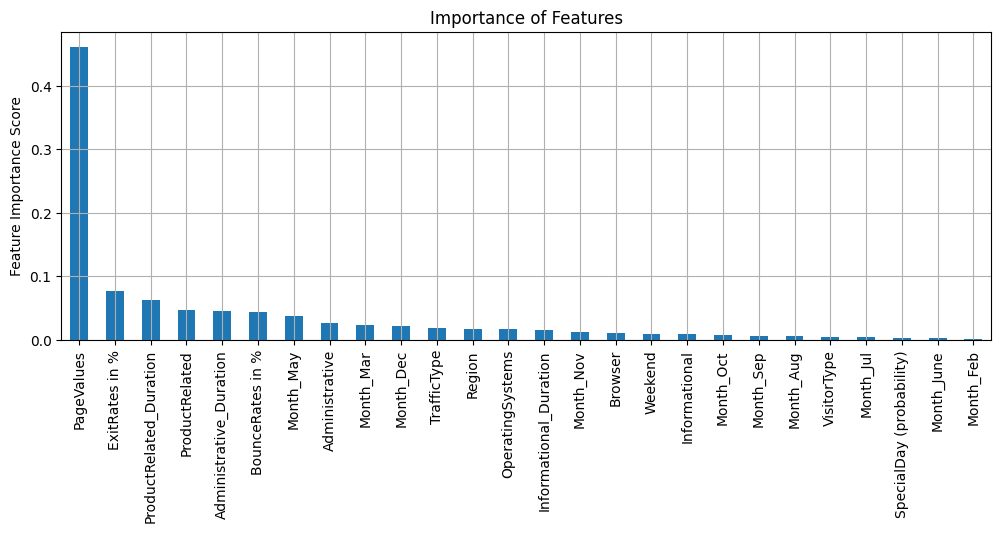

In [64]:
# We can plot how our best model Random Forest classifier sees the importance of different features in the dataset.

feat_imp = pd.Series(rfm1.feature_importances_, list(X)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 4))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print(feat_imp)
plt.grid()
plt.show()

##### As expected, PageValues is the most important feature in our dataset, since it is the feature with the highest level of correlation with our labels (Revenue). In general, this feature importance graph agrees with our correlation analysis of the dataset.

### Conclusion

In this project, we used **Online Shoppers Intention dataset** to build models that can classify website visitor, and predict which of them is likely going to make a purchase on the website. 6 different learning classifiers (Naive Bayes, KNN, SVM, Logistic Regression, Random Forest, and Decision Tree) were tested, and we have achieved the best classification performance using Random Forest classifier, followed by Logistic Regression, and Decision Tree Classifier.

The best classification performance:

**Accuracy:** 
 - 91% (Before Balancing)
 - 93% (After Balancing)

**F1 Score:**
- 0.66 (Before Balancing)
- 0.93 (After Balancing)

Note: There is a clear difference of classification performance between the 2 classes, that is meanly due to the unbalanced nature of our dataset, where around 85% of our data points belong to 1 class, and less than 15% belong to the other. That's why we have used SMOTE technique to balance tha data and again tested the models on balanced data. 